## Regularización

## Esteban Gonzalez 

* Ejercicio 1: Preparación del Ambiente de Trabajo
    - Importe las librerías básicas
    - Importe los métodos asociados a regularización
    - Importe la base de datos

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Ejercicio 2: Análisis exploratorio
  - Identifique el tipo de datos de cada columna.
  - Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de atributos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


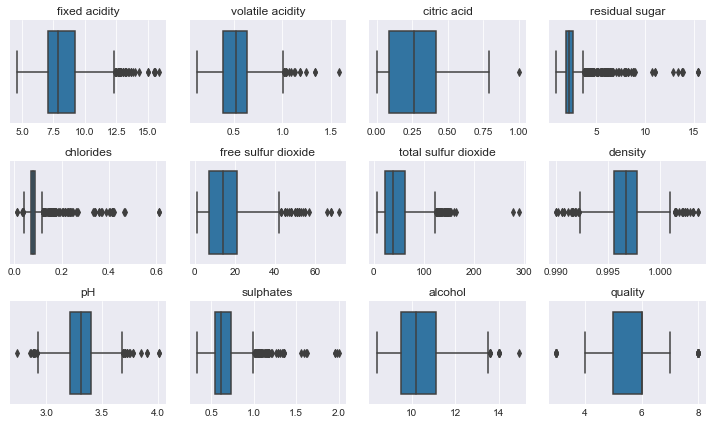

In [5]:
plt.rcParams['figure.figsize'] = (10, 6)
for n, i in enumerate(df):
    plt.subplot(3, 4, n+1)
    if len(df[i].value_counts()) > 2:
        sns.boxplot(df[i]).set_title('Boxplot Precios', size=14);
        plt.title(i)
        plt.xlabel("")
        plt.tight_layout()

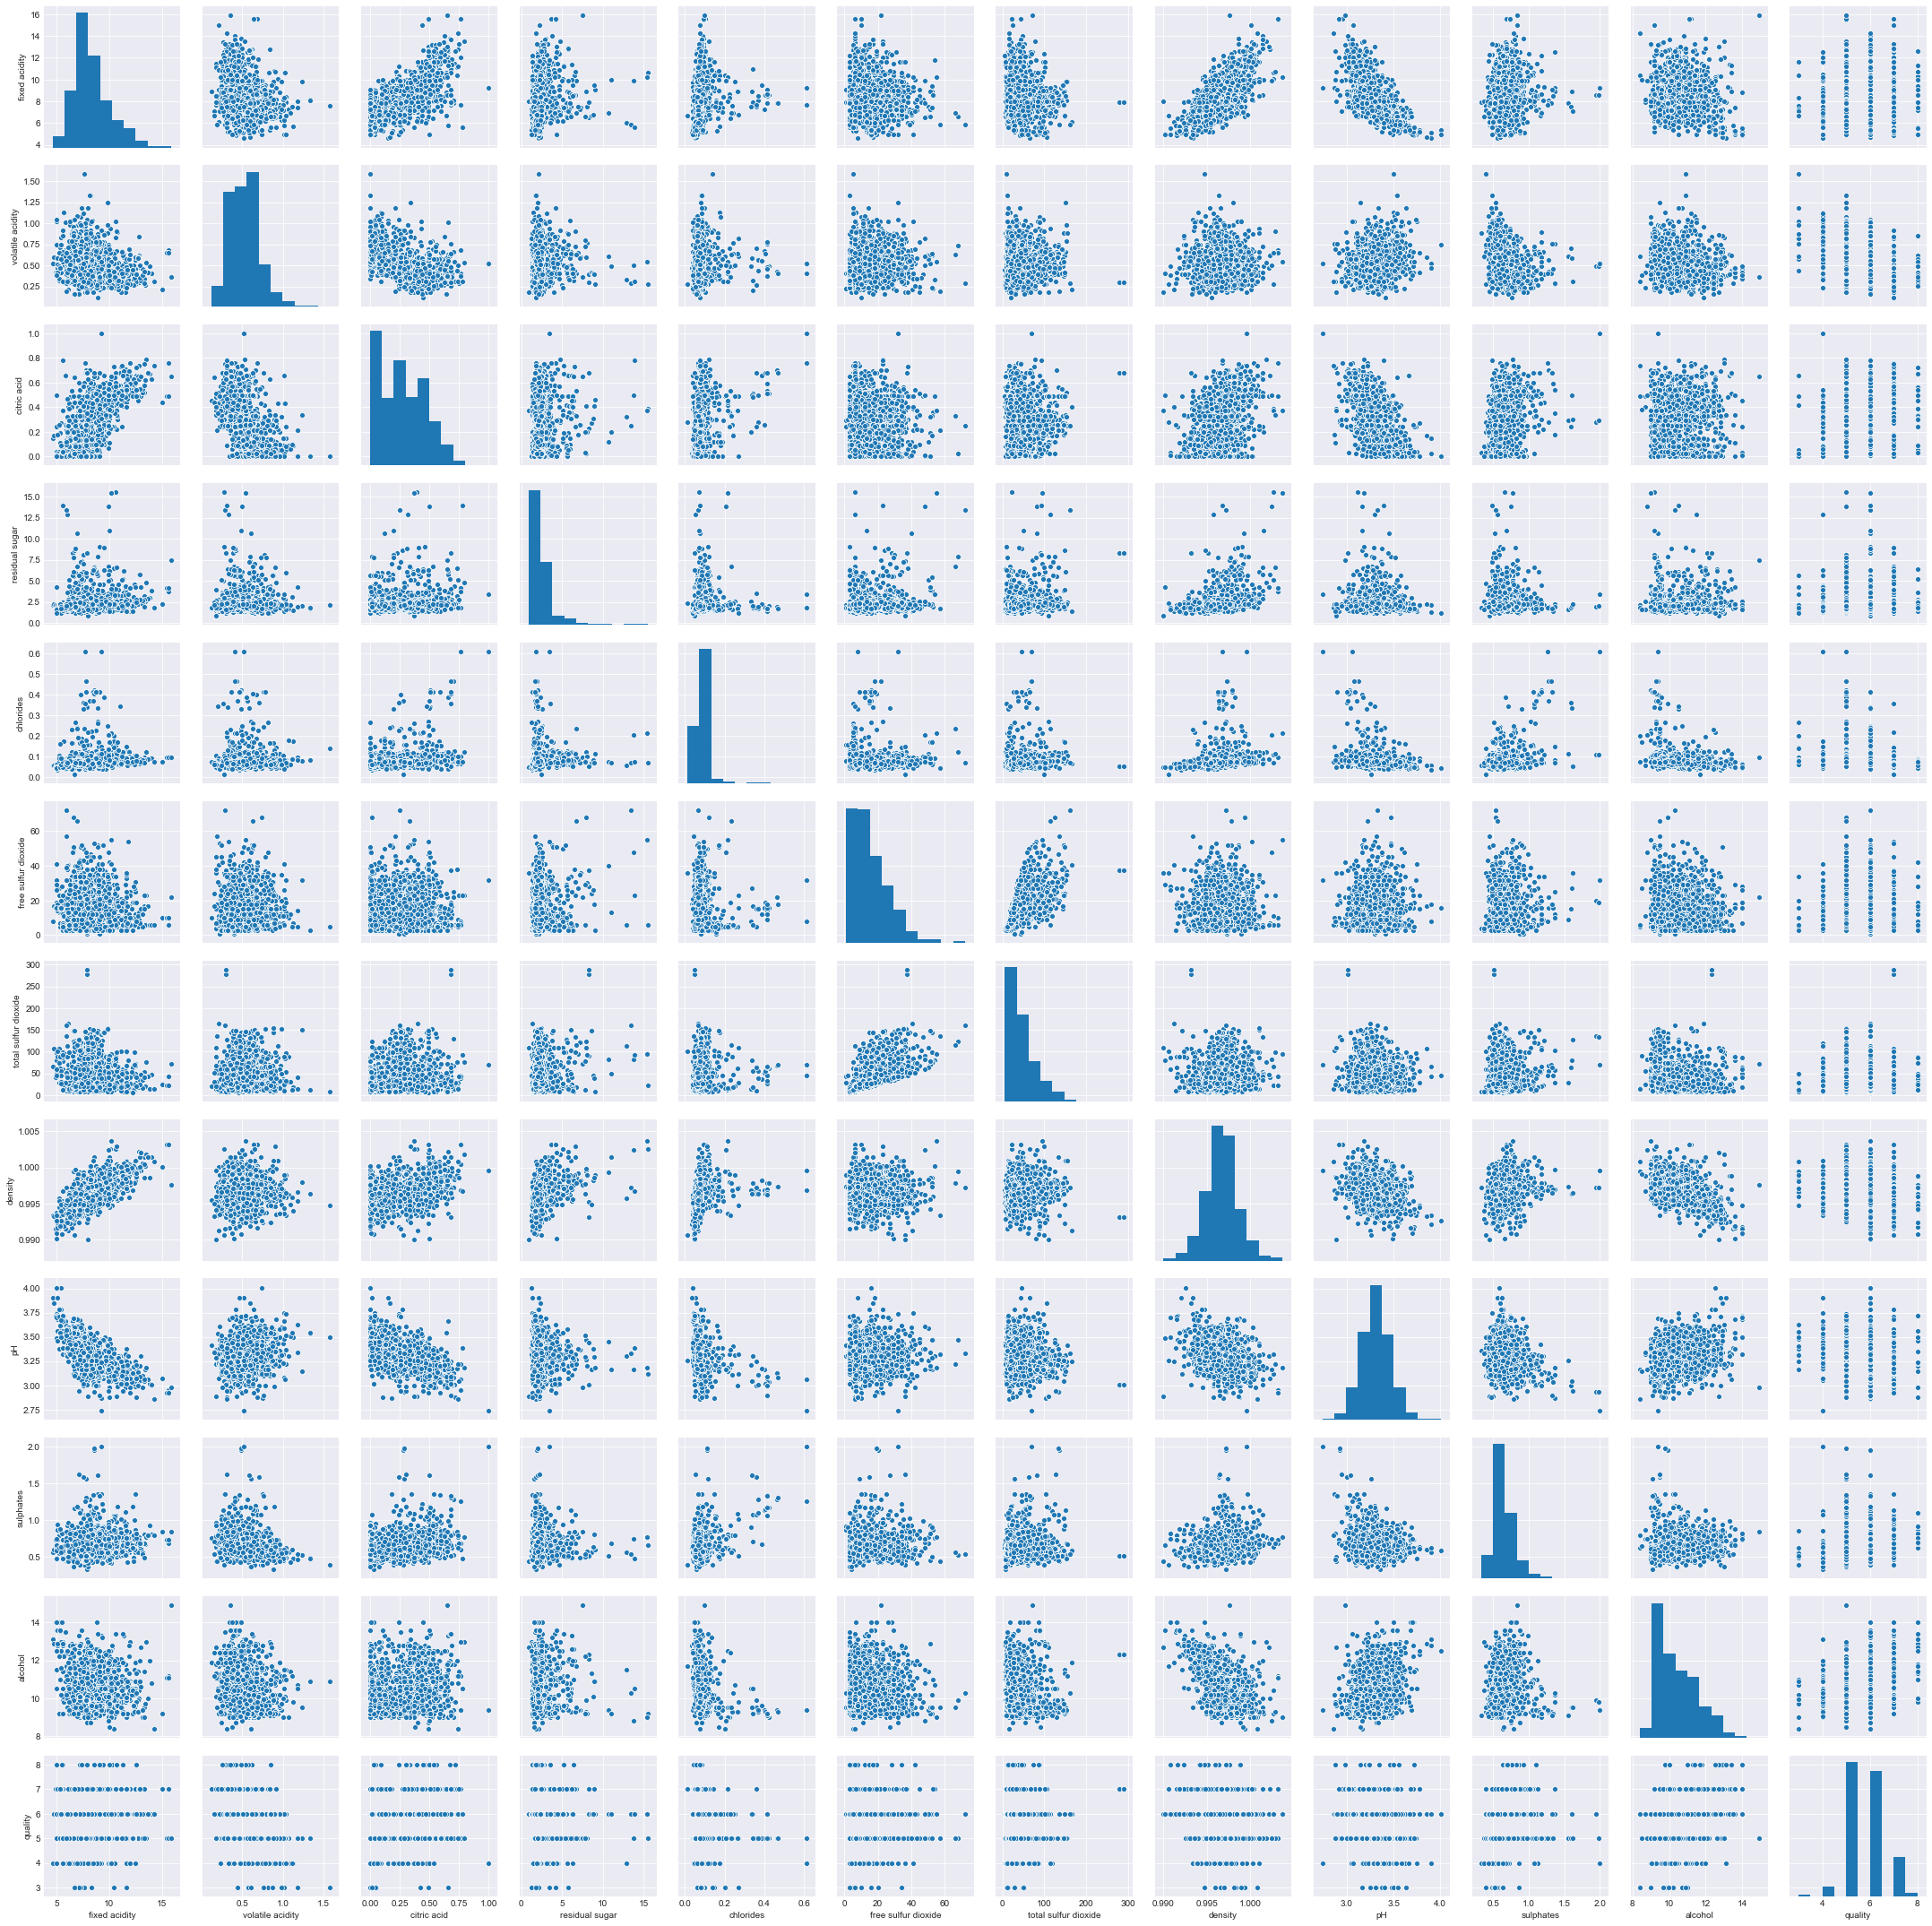

In [6]:
g = sns.pairplot(df)

## Ejercicio 3: Regularización de modelos
- Genere tres modelos, correspondientes a RidgeCV , LassoCV y ElasticNetCV . Para cada uno de ellos implemente los siguientes pasos:
  - Entrene los modelos con 10 validaciones cruzadas.
  - Extraiga los coeficientes estimados, el mejor valor alpha, MAE ( median_absolute_error )y RMSE ( mean_squared_error ) asociado a cada modelo.
 - En base a la información solicitada, responda lo siguiente:
     - ¿Qué modelo presenta un mejor desempeño en base a las métricas?
     - ¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?

In [7]:
def report_regularization(model, X_test, y_test):
    print('Valor del parámetro de regularización: {0}'.format(model.alpha_))
    print('Coeficientes finales: \n{0}'.format(model.coef_))
    y_hat = model.predict(X_test)
    print('R-squared: {0}'.format(r2_score(y_test,y_hat)))
    print('Mean Squared Error: {0}'.format(mean_squared_error(y_test, y_hat)))
    print('Median absolute Error: {0}'.format(median_absolute_error(y_test, y_hat)))

In [8]:
# procesamiento

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

X = df_scaled.iloc[:, :-1]
y= df_scaled.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size= 0.3,
    shuffle = True,
    random_state = 42)  

### ridge

In [9]:
ridge_cv = RidgeCV(cv=10)
model_ridge = ridge_cv.fit(X_train, y_train)
ridge_mae = median_absolute_error(model_ridge.predict(X_test), y_test)
ridge_rmse = np.sqrt(mean_squared_error(model_ridge.predict(X_test), y_test))

In [10]:
report_regularization(model_ridge, X_test, y_test)

Valor del parámetro de regularización: 10.0
Coeficientes finales: 
[ 0.05485804 -0.24055892 -0.05471447  0.01554006 -0.09737494  0.05718067
 -0.13185875 -0.04058064 -0.05620677  0.17041424  0.37789709]
R-squared: 0.35154414789446764
Mean Squared Error: 0.6308086840078668
Median absolute Error: 0.5224055418889855


### lasso

In [11]:
lasso_cv = LassoCV(cv=10)
model_lasso = lasso_cv.fit(X_train, y_train)
lasso_mae = median_absolute_error(model_lasso.predict(X_test), y_test)
lasso_rmse = np.sqrt(mean_squared_error(model_lasso.predict(X_test), y_test))


In [12]:
report_regularization(model_lasso, X_test, y_test)

Valor del parámetro de regularización: 0.009882181369156485
Coeficientes finales: 
[ 0.         -0.22908651 -0.01429804  0.         -0.09071513  0.0353404
 -0.11405529 -0.         -0.05440036  0.15405499  0.39137145]
R-squared: 0.34822022977445755
Mean Squared Error: 0.6340421445560681
Median absolute Error: 0.5288596819528029


### Elastic net

In [13]:
enet_cv = ElasticNetCV(cv=10)
model_enet = enet_cv.fit(X_train, y_train)
enet_mae = median_absolute_error(model_enet.predict(X_test), y_test)
enet_rmse = np.sqrt(mean_squared_error(model_enet.predict(X_test), y_test))

In [14]:
report_regularization(model_enet, X_test, y_test)

Valor del parámetro de regularización: 0.019764362738312963
Coeficientes finales: 
[ 0.         -0.22681603 -0.01092238  0.         -0.09051859  0.03423305
 -0.11326354 -0.         -0.0518065   0.15308137  0.38731962]
R-squared: 0.34806527390770736
Mean Squared Error: 0.6341928834322254
Median absolute Error: 0.5290091532214947


In [15]:
# en este caso rigde tiene un mejor comportamiento, debido a que tiene mejores valoraciones en R2 y MAE,
#laso tiene mejor desempeño en MSE

In [16]:
modelos = [model_lasso,model_ridge,model_enet]
lista=[]
lista.append(X.columns)
for i in modelos:
    lista.append(i.coef_)    


In [17]:
df_modelos = pd.DataFrame(data=lista)
df_modelos = df_modelos.T
df_modelos.columns=['variables','model_lasso','model_ridge','model_enet']
df_modelos

,variables,model_lasso,model_ridge,model_enet
0,fixed acidity,0,0.054858,0
1,volatile acidity,-0.229087,-0.240559,-0.226816
2,citric acid,-0.014298,-0.0547145,-0.0109224
3,residual sugar,0,0.0155401,0
4,chlorides,-0.0907151,-0.0973749,-0.0905186
5,free sulfur dioxide,0.0353404,0.0571807,0.0342331
6,total sulfur dioxide,-0.114055,-0.131859,-0.113264
7,density,-0,-0.0405806,-0
8,pH,-0.0544004,-0.0562068,-0.0518065
9,sulphates,0.154055,0.170414,0.153081


In [18]:
# analizando los datos que la tabla nos otorga, se logra observar que hay algunos valores que se mantienen relativaente
#similares en los 3 modelos (volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, pH, sulphates y alcohol)